# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [27]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [3]:
csv_file_path = '../data/Fitbit2.csv'

fitbit = pd.read_csv(csv_file_path)

fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

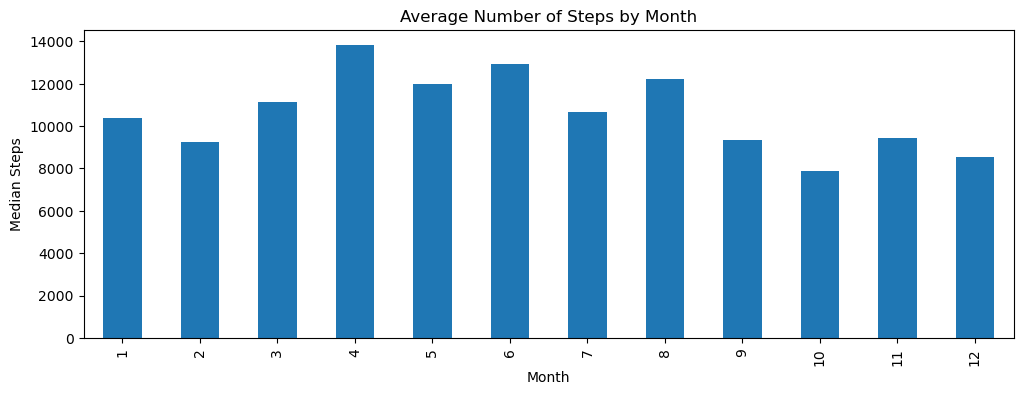

In [7]:
median_steps_by_month = fitbit.groupby('Months_encoded')['Steps'].median()

fig, ax = plt.subplots(figsize=(12, 4))

median_steps_by_month.plot(kind='bar', ax=ax)

ax.set_xlabel('Month')
ax.set_ylabel('Median Steps')
ax.set_title('Average Number of Steps by Month')

plt.xticks(range(len(median_steps_by_month)), median_steps_by_month.index)

plt.show()

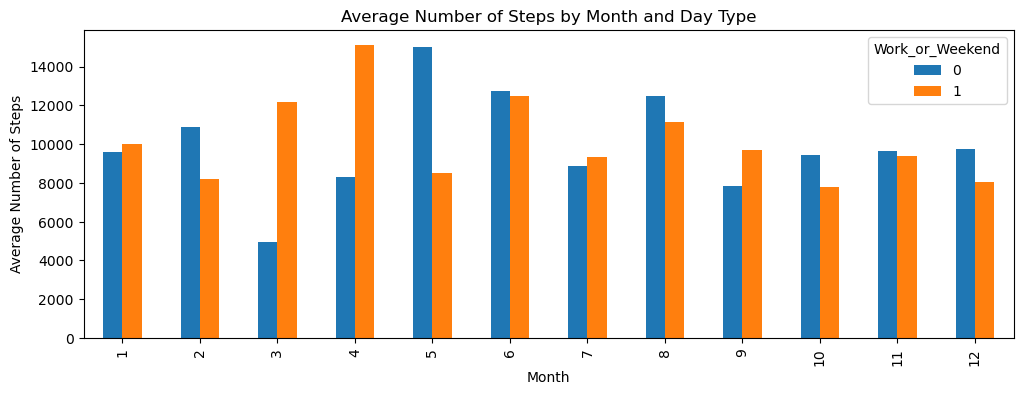

In [8]:
average_steps_by_month_day = fitbit.groupby(['Months_encoded', 'Work_or_Weekend'])['Steps'].mean().unstack()

fig, ax = plt.subplots(figsize=(12, 4))

plt.sca(ax)

average_steps_by_month_day.plot(kind='bar', ax=ax)

ax.set_xlabel('Month')
ax.set_ylabel('Average Number of Steps')
ax.set_title('Average Number of Steps by Month and Day Type')

plt.xticks(range(len(average_steps_by_month_day)), average_steps_by_month_day.index)

plt.show()


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

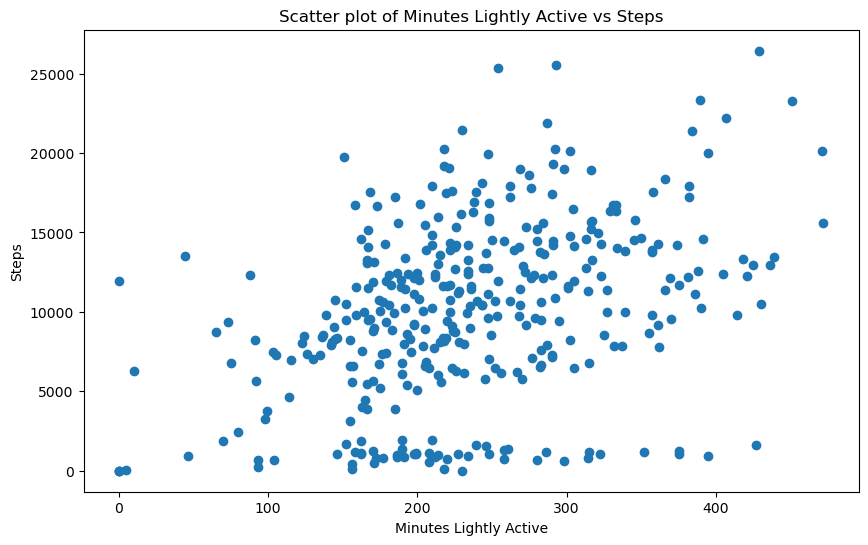

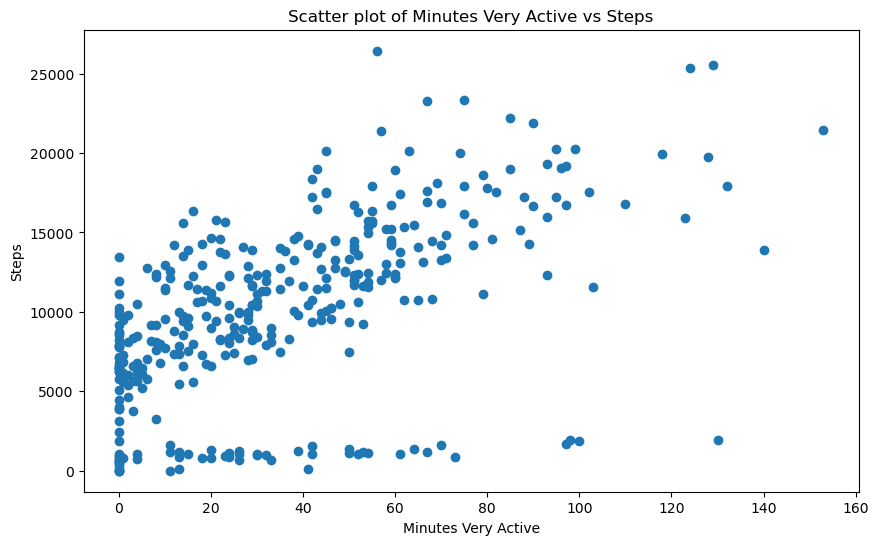

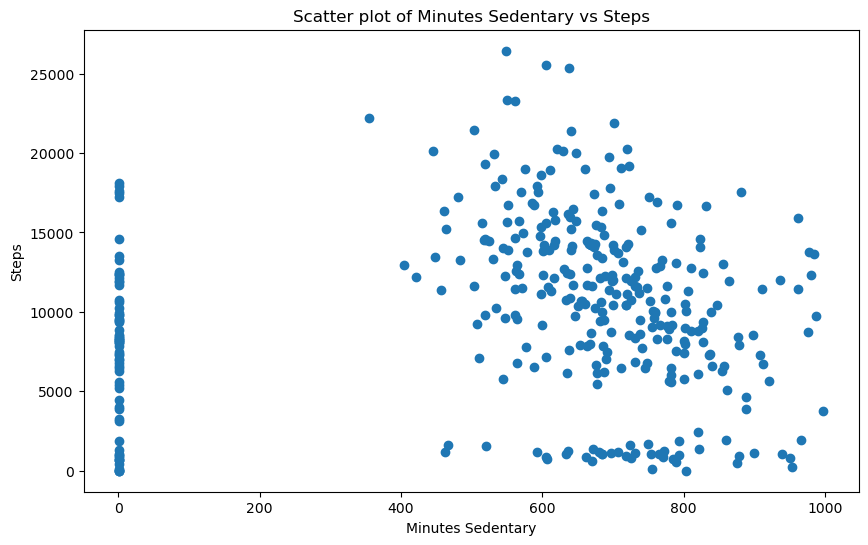

In [10]:
# List of feature pairs to plot
features = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

# Loop to plot each pair
for feature in features:
    plt.figure(figsize=(10,6))
    plt.scatter(fitbit[feature], fitbit['Steps'])
    plt.xlabel(feature)
    plt.ylabel('Steps')
    plt.title(f'Scatter plot of {feature} vs Steps')
    plt.show()

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [11]:
titanic = pd.read_csv('../data/titanic.csv')

In [12]:
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [13]:
print(titanic.dtypes)


PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [15]:
numerical_vars = titanic.select_dtypes(include=['int64', 'float64'])
numerical_vars

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [19]:
categorical_vars = titanic.select_dtypes(include=['object', 'bool'])
categorical_vars

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [20]:
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [12, 6]

#### Use the right visulalization to show the distribution of column `Age`.

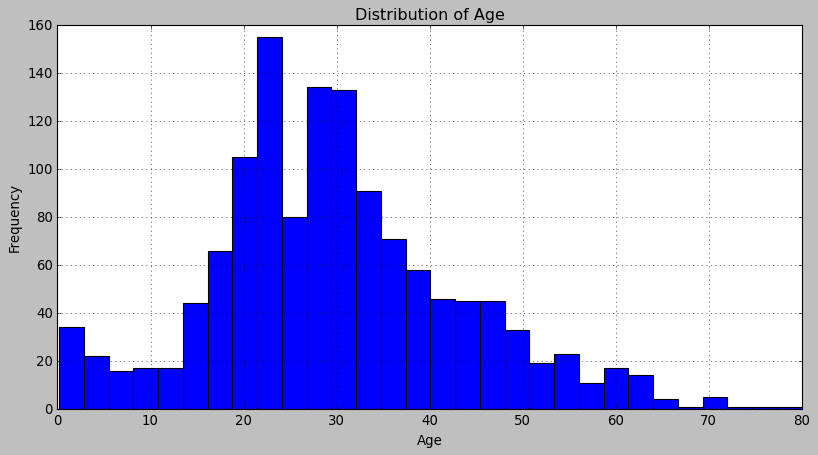

In [22]:
titanic['Age'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

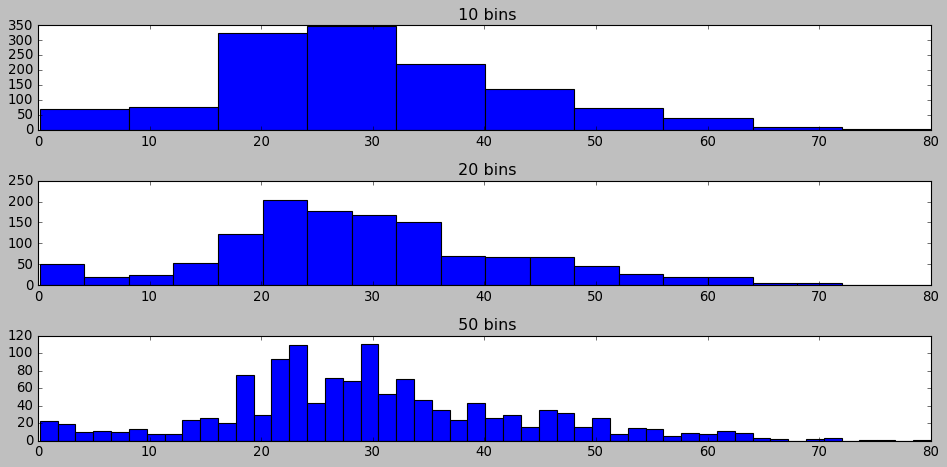

In [25]:
bins = [10, 20, 50]

fig, axs = plt.subplots(len(bins), 1, figsize=(12,6))

for ax, bin_size in zip(axs, bins):
    ax.hist(titanic['Age'].dropna(), bins=bin_size, edgecolor='black')
    ax.set_title(f' {bin_size} bins')

plt.tight_layout()
plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
The bin size makes the distribution's representation change, the lower the bins are the more cluttered it looks
"""

#### Use seaborn to show the distribution of column `Age`.

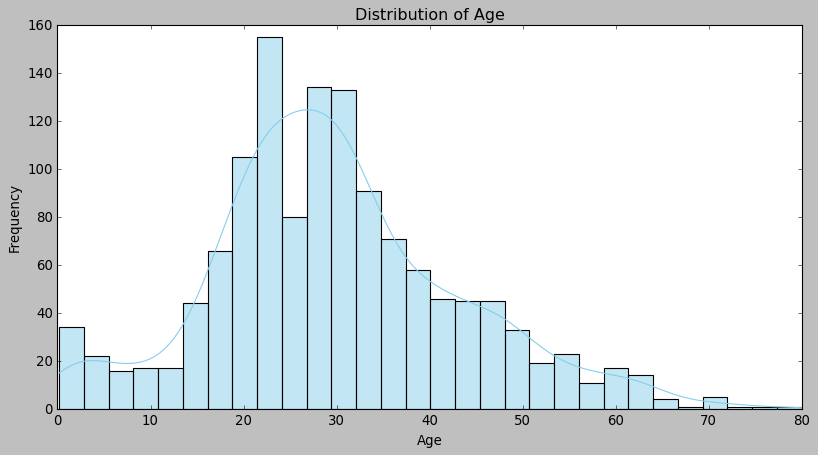

In [29]:
sns.histplot(data=titanic, x='Age', kde=True, color='skyblue', bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

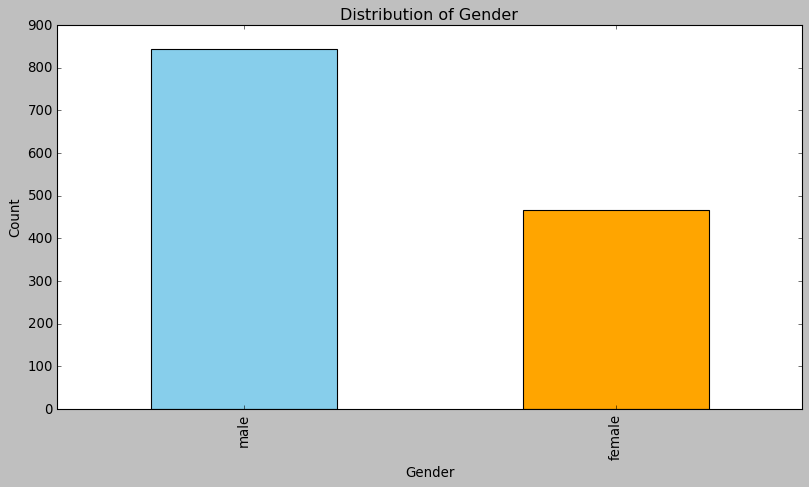

In [32]:
# Method 2 - Matplotlib

gender_counts = titanic['Gender'].value_counts()

gender_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

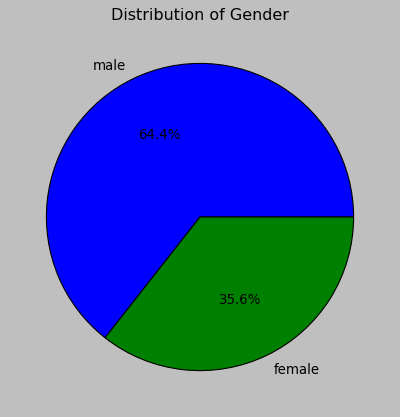

In [33]:
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.ylabel('')  # This hides the y-axis label for the pie chart
plt.show()

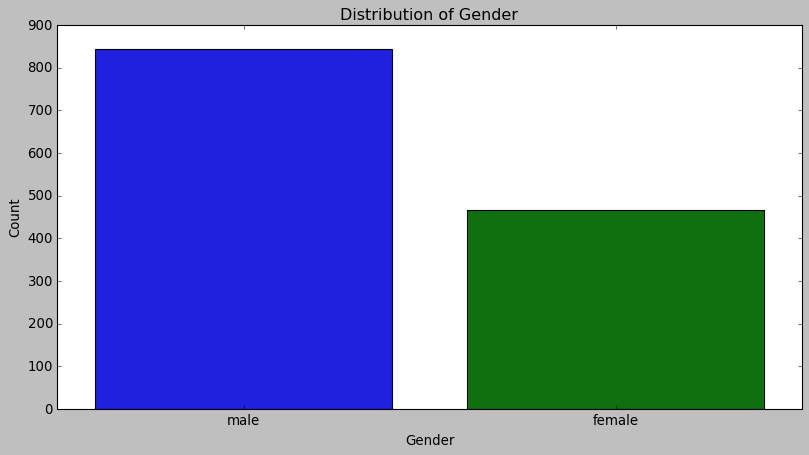

In [35]:
# Method 2 - seaborn
sns.countplot(data=titanic, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Use the right plot to visualize the column `Pclass`.

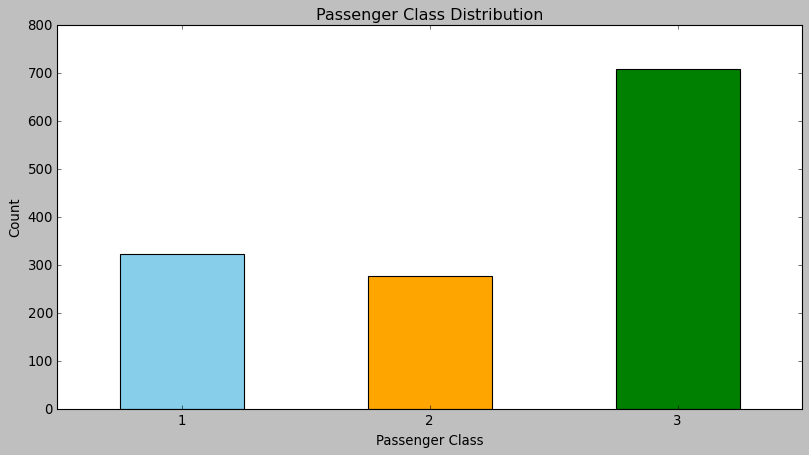

In [36]:
pclass_counts = titanic['Pclass'].value_counts().sort_index()

pclass_counts.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

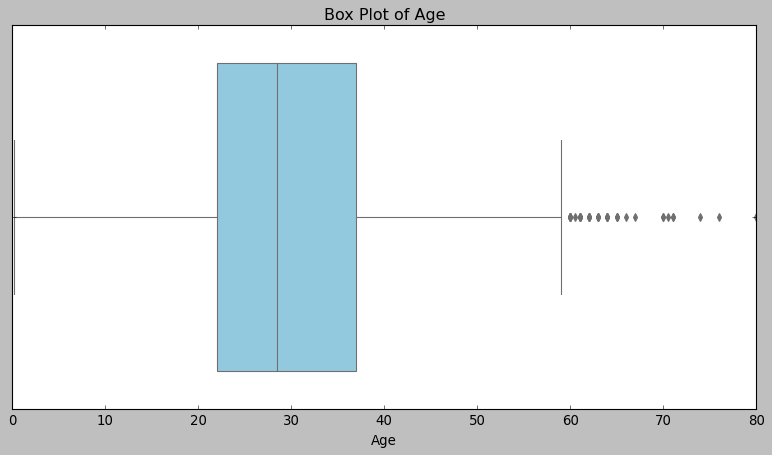

In [37]:
sns.boxplot(data=titanic, x='Age', color='skyblue')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
This boxplot shows us the 50% of the data being comprised in the 20/40 years range and the median being aproximately 28 years"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

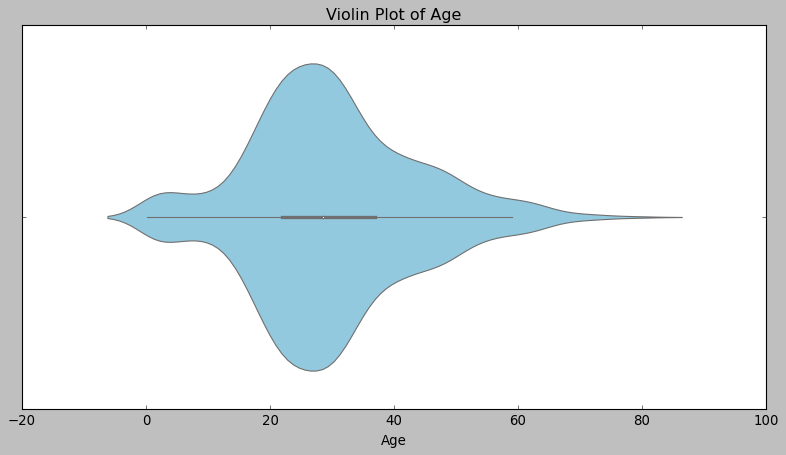

In [39]:
sns.violinplot(data=titanic, x='Age', color='skyblue')
plt.title('Violin Plot of Age')
plt.xlabel('Age')
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
This plot shows the nuber of passengers comprised in every age, the wider areas being in the age renges with more passengers"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

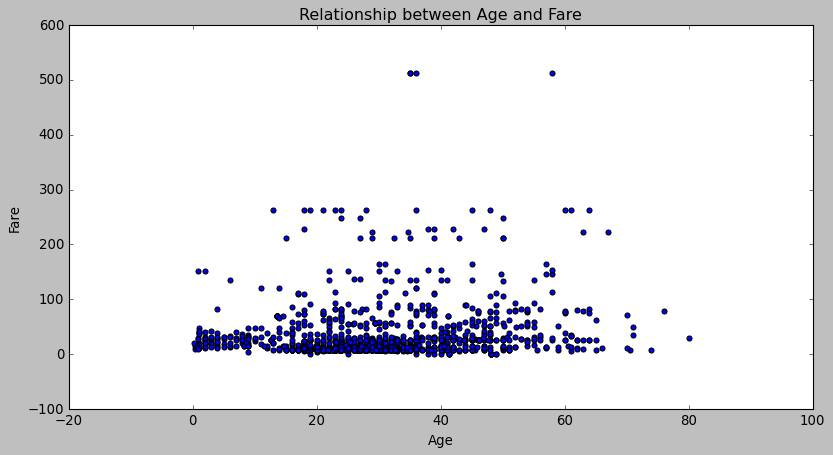

In [42]:
# Method 1 - matplotlib
plt.scatter(titanic['Age'], titanic['Fare'])
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

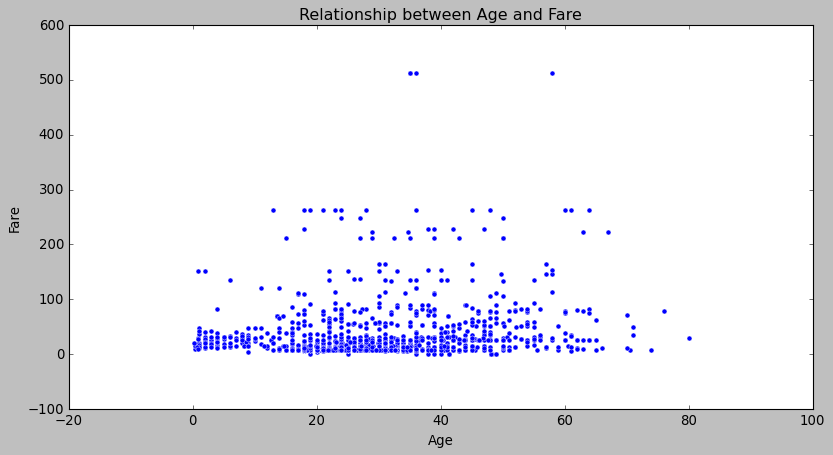

In [43]:
# Method 2 - seaborn
sns.scatterplot(data=titanic, x='Age', y='Fare')
plt.title('Relationship between Age and Fare')
plt.show()

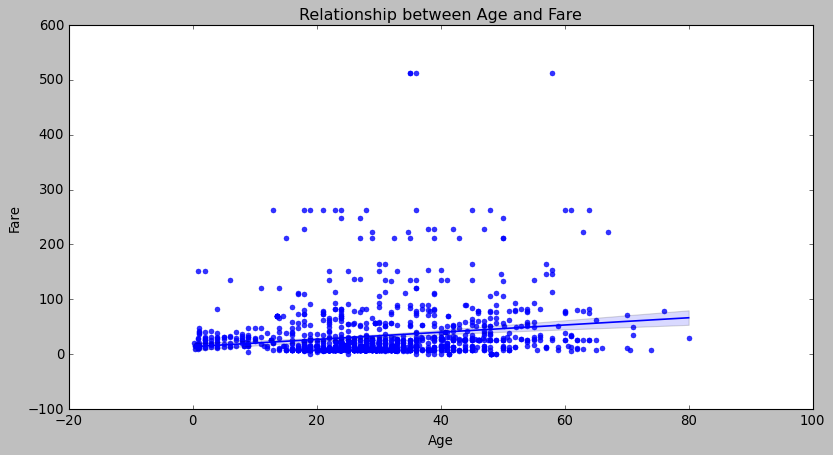

In [45]:
sns.regplot(data=titanic, x='Age', y='Fare')
plt.title('Relationship between Age and Fare')
plt.show()

#### Plot the correlation matrix using seaborn.

/var/folders/5x/gn6s3css5x508rs__lb9ck2w0000gn/T/ipykernel_24772/505243275.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic.corr()


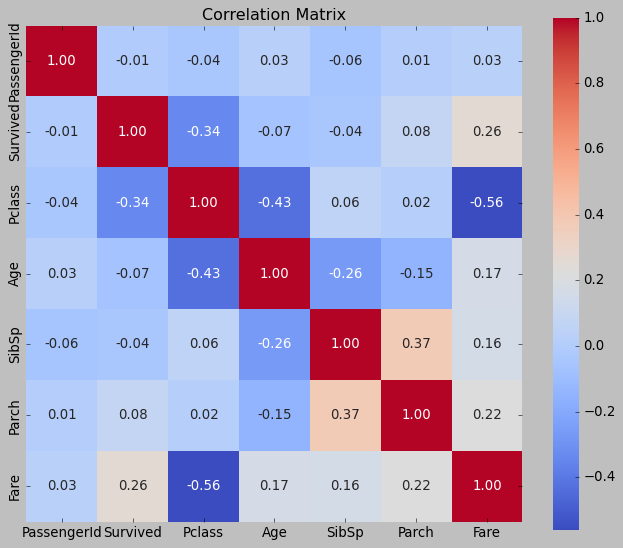

In [46]:
corr = titanic.corr()

plt.figure(figsize=(10,8))  
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title('Correlation Matrix')
plt.show()

In [47]:
cols = corr.columns

mask = np.triu(np.ones_like(corr, dtype=bool))

corr_flat = corr.mask(mask).stack().reset_index()
corr_flat.columns = ['Feature 1', 'Feature 2', 'Correlation Coefficient']

corr_flat['Abs Correlation'] = corr_flat['Correlation Coefficient'].abs()
corr_flat.sort_values(by='Abs Correlation', ascending=False, inplace=True)

print(corr_flat.head())

   Feature 1 Feature 2  Correlation Coefficient  Abs Correlation
17      Fare    Pclass                -0.558683         0.558683
5        Age    Pclass                -0.425965         0.425965
14     Parch     SibSp                 0.373587         0.373587
2     Pclass  Survived                -0.338481         0.338481
9      SibSp       Age                -0.260706         0.260706


#### What are the most correlated features?

In [ ]:
"""
Fare and Pclass are the most strongly correlated features, followed by Age and Pclass
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

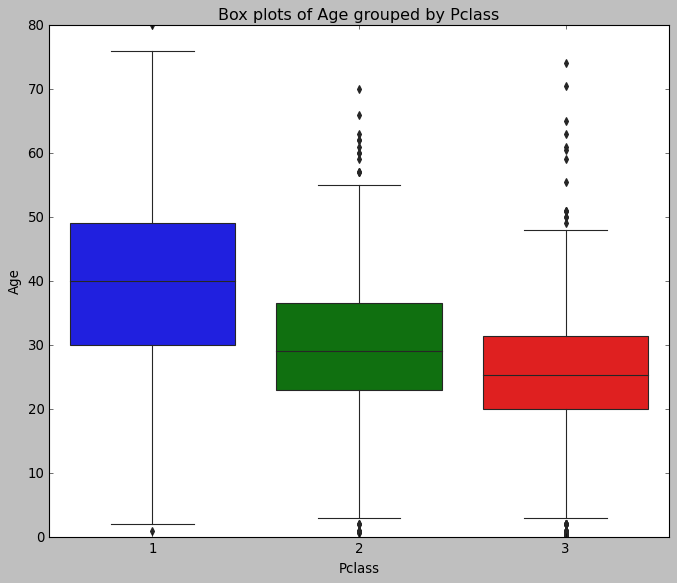

In [48]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass', y='Age', data=titanic)
plt.title('Box plots of Age grouped by Pclass')
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

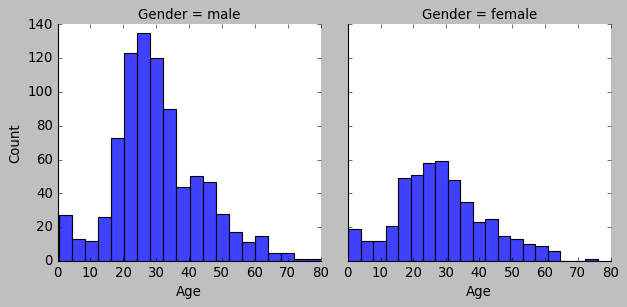

In [49]:
g = sns.FacetGrid(titanic, col='Gender', height=4, aspect=1)

g.map(sns.histplot, 'Age', kde=False, bins=20)

plt.show()